In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
df = pd.read_csv('dataframe_cl.csv', sep = ',')
df.head()

,reservationNumber,from,passengers,rider,serviceLevel,scheduledTime,start_lt,start_lg,end_lt,end_lg,datetime,dayofweek
0,RES-Q1HKZK,"5175 South Old Peachtree Road, Norcross, GA, U...",1,585eeca79b1441f8923662ed,standard,2017-06-08T20:09:00.000Z,33.969514,-84.207254,33.979448,-84.195755,2017-06-08 20:09:00,Thursday
1,RES-Q1H68F,"2979, Lake Colony, Lake Colony Drive Northwest...",1,572763e3c9c845d866b9badc,standard,2017-06-08T20:07:00.000Z,33.930708,-84.259075,33.946081,-84.241015,2017-06-08 20:07:00,Thursday
2,RES-Q1GV1Z,"Casa Blanca Restaurant, Peachtree Industrial B...",1,591971fd7fffbb38fbdbf3a6,standard,2017-06-08T20:05:00.000Z,33.929286,-84.267367,33.944177,-84.241429,2017-06-08 20:05:00,Thursday
3,RES-Q1GCJA,"LA Fitness, Jimmy Carter Boulevard, Norcross, ...",1,573f75b7e0588bc00d12790e,standard,2017-06-08T20:04:00.000Z,33.947417,-84.241758,33.960076,-84.249217,2017-06-08 20:04:00,Thursday
4,RES-Q1G54R,"Little Caesars Pizza, Holcomb Bridge Road, Nor...",2,58dd445eb47957072ebe26ae,standard,2017-06-08T20:01:00.000Z,33.952770,-84.241511,33.952311,-84.241521,2017-06-08 20:01:00,Thursday


In [3]:
df[['start_lt', 'start_lg', 'end_lt', 'end_lg']] = df[['start_lt', 'start_lg', 'end_lt', 'end_lg']].apply(lambda x: np.floor(x*100)/100)

df.head()

,reservationNumber,from,passengers,rider,serviceLevel,scheduledTime,start_lt,start_lg,end_lt,end_lg,datetime,dayofweek
0,RES-Q1HKZK,"5175 South Old Peachtree Road, Norcross, GA, U...",1,585eeca79b1441f8923662ed,standard,2017-06-08T20:09:00.000Z,33.96,-84.21,33.97,-84.20,2017-06-08 20:09:00,Thursday
1,RES-Q1H68F,"2979, Lake Colony, Lake Colony Drive Northwest...",1,572763e3c9c845d866b9badc,standard,2017-06-08T20:07:00.000Z,33.93,-84.26,33.94,-84.25,2017-06-08 20:07:00,Thursday
2,RES-Q1GV1Z,"Casa Blanca Restaurant, Peachtree Industrial B...",1,591971fd7fffbb38fbdbf3a6,standard,2017-06-08T20:05:00.000Z,33.92,-84.27,33.94,-84.25,2017-06-08 20:05:00,Thursday
3,RES-Q1GCJA,"LA Fitness, Jimmy Carter Boulevard, Norcross, ...",1,573f75b7e0588bc00d12790e,standard,2017-06-08T20:04:00.000Z,33.94,-84.25,33.96,-84.25,2017-06-08 20:04:00,Thursday
4,RES-Q1G54R,"Little Caesars Pizza, Holcomb Bridge Road, Nor...",2,58dd445eb47957072ebe26ae,standard,2017-06-08T20:01:00.000Z,33.95,-84.25,33.95,-84.25,2017-06-08 20:01:00,Thursday


In [4]:
df['datetime'] = pd.to_datetime(df['datetime'],format = '%Y-%m-%d %H:%M:%S')
df['hourofday'] = df['datetime'].dt.hour
df.head()

,reservationNumber,from,passengers,rider,serviceLevel,scheduledTime,start_lt,start_lg,end_lt,end_lg,datetime,dayofweek,hourofday
0,RES-Q1HKZK,"5175 South Old Peachtree Road, Norcross, GA, U...",1,585eeca79b1441f8923662ed,standard,2017-06-08T20:09:00.000Z,33.96,-84.21,33.97,-84.20,2017-06-08 20:09:00,Thursday,20
1,RES-Q1H68F,"2979, Lake Colony, Lake Colony Drive Northwest...",1,572763e3c9c845d866b9badc,standard,2017-06-08T20:07:00.000Z,33.93,-84.26,33.94,-84.25,2017-06-08 20:07:00,Thursday,20
2,RES-Q1GV1Z,"Casa Blanca Restaurant, Peachtree Industrial B...",1,591971fd7fffbb38fbdbf3a6,standard,2017-06-08T20:05:00.000Z,33.92,-84.27,33.94,-84.25,2017-06-08 20:05:00,Thursday,20
3,RES-Q1GCJA,"LA Fitness, Jimmy Carter Boulevard, Norcross, ...",1,573f75b7e0588bc00d12790e,standard,2017-06-08T20:04:00.000Z,33.94,-84.25,33.96,-84.25,2017-06-08 20:04:00,Thursday,20
4,RES-Q1G54R,"Little Caesars Pizza, Holcomb Bridge Road, Nor...",2,58dd445eb47957072ebe26ae,standard,2017-06-08T20:01:00.000Z,33.95,-84.25,33.95,-84.25,2017-06-08 20:01:00,Thursday,20


In [5]:
df_mon_09 = df[(df['dayofweek'] == 'Monday') & (df['hourofday'] == 9)]


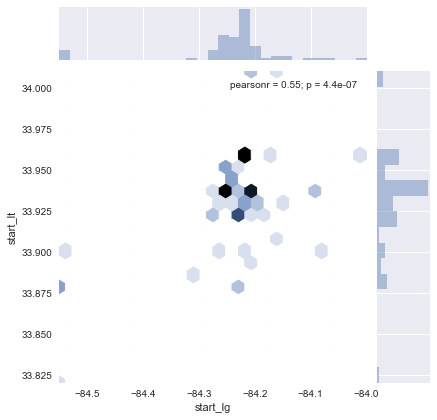

In [15]:
plt.clf()
hex_plot = sns.jointplot(x=df_mon_09['start_lg'], y=df['start_lt'], kind = 'hex')
# hex_plot.savefig("output3.png")
plt.show()


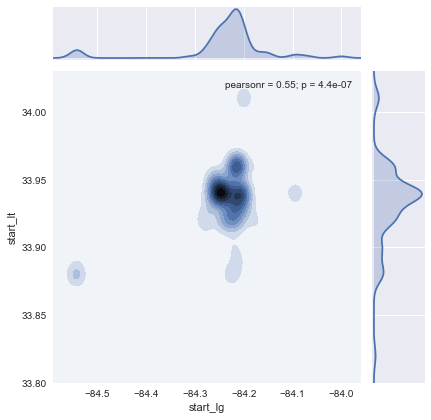

In [14]:
plt.clf()
hex_plot = sns.jointplot(x=df_mon_09['start_lg'], y=df_mon_09['start_lt'], kind = 'kde')
hex_plot.savefig("output2.png", dpi = 200)
plt.show()


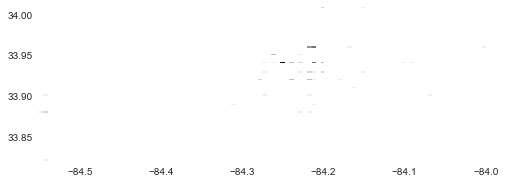

In [13]:
heatmap, xedges, yedges = np.histogram2d(df_mon_09['start_lg'], df_mon_09['start_lt'], bins=(100,100))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

In [9]:
df_mon_09['startLoc'] = df_mon_09['start_lg'].astype(str) + ', ' + df_mon_09['start_lt'].astype(str)
df_mon_09['startLoc'].value_counts()

/Users/michaelli/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


-84.25, 33.94    8
-84.21, 33.96    5
-84.21, 33.94    5
-84.22, 33.96    4
-84.2, 33.94     3
-84.26, 33.95    3
-84.22, 33.92    3
-84.24, 33.94    3
-84.24, 33.92    3
-84.54, 33.88    2
-84.22, 33.93    2
-84.2, 33.93     2
-84.23, 33.94    2
-84.2, 34.01     2
-84.28, 33.92    2
-84.27, 33.93    1
-84.15, 33.93    1
-84.0, 33.96     1
-84.27, 33.94    1
-84.55, 33.88    1
-84.21, 33.93    1
-84.26, 33.94    1
-84.22, 33.88    1
-84.31, 33.89    1
-84.54, 33.9     1
-84.1, 33.94     1
-84.07, 33.9     1
-84.21, 33.92    1
-84.21, 33.89    1
-84.27, 33.9     1
-84.22, 33.9     1
-84.54, 33.82    1
-84.18, 33.92    1
-84.16, 33.91    1
-84.09, 33.94    1
-84.23, 33.95    1
-84.23, 33.93    1
-84.15, 34.01    1
-84.23, 33.88    1
-84.17, 33.96    1
Name: startLoc, dtype: int64

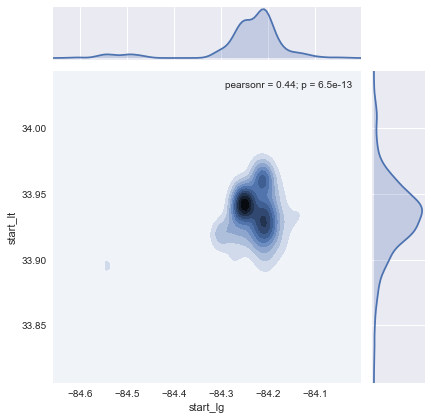

In [26]:
df_fri_14 = df[(df['dayofweek'] == 'Friday') & (df['hourofday'] == 14)]
plt.clf()
hex_plot2 = sns.jointplot(x=df_fri_14['start_lg'], y=df_fri_14['start_lt'], kind = 'kde')
# hex_plot.savefig("output3.png")
plt.show()


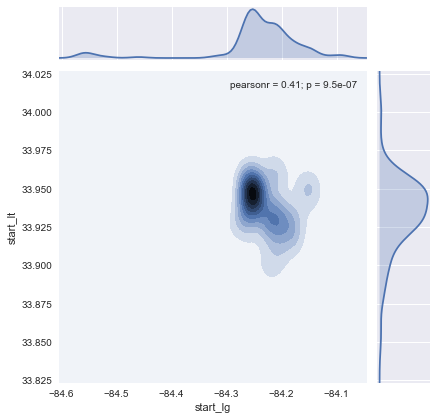

In [31]:
df_sun_14 = df[(df['dayofweek'] == 'Sunday') & (df['hourofday'] == 14)]
plt.clf()
hex_plot2 = sns.jointplot(x=df_sun_14['start_lg'], y=df_sun_14['start_lt'], kind = 'kde')
# hex_plot.savefig("output3.png")
plt.show()


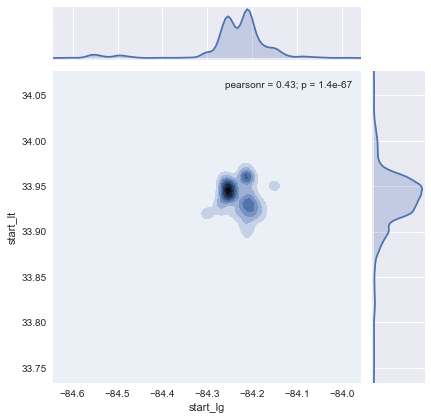

In [30]:
df_14 = df[df['hourofday'] == 14]
plt.clf()
hex_plot2 = sns.jointplot(x=df_14['start_lg'], y=df_14['start_lt'], kind = 'kde')
# hex_plot.savefig("output3.png")
plt.show()


In [29]:
df['startLoc'] = df['start_lg'].astype(str) + ', ' + df['start_lt'].astype(str)
df['endLoc'] = df['end_lg'].astype(str) + ', ' + df['end_lt'].astype(str)
df[['dayofweek', 'hourofday','reservationNumber','startLoc','endLoc']].groupby(['dayofweek','hourofday']).nunique()

dayofweek  hourofday  reservationNumber  startLoc  endLoc
dayofweek hourofday                                                           
Friday    0                  1          1                 93        53      51
          1                  1          1                 86        44      48
          2                  1          1                 82        40      43
          3                  1          1                 59        39      38
          4                  1          1                 48        32      33
          5                  1          1                 34        19      23
          6                  1          1                 31        25      24
          7                  1          1                 33        27      31
          8                  1          1                 55        37      36
          9                  1          1                101        38      45
          10                 1          1                180        56      71
          11                 1          1                194        72      84
          12                 1          1                213        70      85
          13                 1          1                242        93     112
          14                 1          1                240        96     108
          15                 1          1                202        94      97
          16                 1          1                187        92     105
          17                 1          1                181        82      89
          18                 1          1                134        65      70
          19                 1          1                144        67      63
          20                 1          1                119        68      55
          21                 1          1                135        61      60
          22                 1          1                131        62      64
          23                 1          1                118        59      62
Monday    0                  1          1                140        66      59
          1                  1          1                101        43      49
          2                  1          1                 79        45      44
          3                  1          1                 65        36      39
          4                  1          1                 54        37      33
          5                  1          1                 32        23      28
...                        ...        ...                ...       ...     ...
Tuesday   18                 1          1                193        73      89
          19                 1          1                172        80      77
          20                 1          1                171        76      70
          21                 1          1                150        73      74
          22                 1          1                109        58      62
          23                 1          1                102        57      51
Wednesday 0                  1          1                 98        56      51
          1                  1          1                 95        46      51
          2                  1          1                 81        42      48
          3                  1          1                 61        42      47
          4                  1          1                 29        21      24
          5                  1          1                 35        24      24
          6                  1          1                 25        22      16
          7                  1          1                 24        19      24
          8                  1          1                 33        19      21
          9                  1          1                 93        39      43
          10                 1          1                145        55      66
          11                 1          1                179        61 